In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!unzip /content/drive/MyDrive/codes/airplanedataset.zip -d /content/drive/MyDrive/codes/airplanedataset

Archive:  /content/drive/MyDrive/codes/airplanedataset.zip
replace /content/drive/MyDrive/codes/airplanedataset/airplanedataset/Test/A-10/15-1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
train = "/content/drive/MyDrive/codes/airplanedataset/airplanedataset/Train/"
test = "/content/drive/MyDrive/codes/airplanedataset/airplanedataset/Test/"

# veri setimize göz atalım

img = load_img(train + "E-3/9-22.jpg")
img_to_array(img).shape

(145, 145, 3)

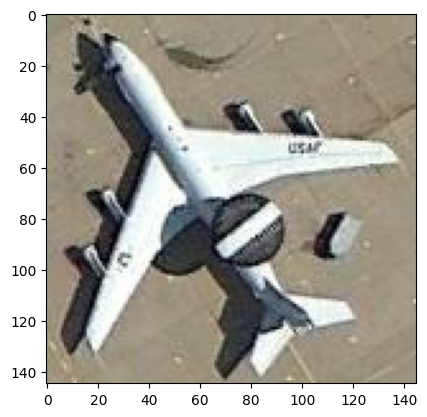

In [5]:
plt.imshow(img)
plt.show()

In [6]:
# target_size = (224,244) : vgg16 giriş olarak bu boyutu istediği için tüm dataya reshape uygulayalım
train_data = ImageDataGenerator().flow_from_directory(train, target_size = (224,244))
test_data = ImageDataGenerator().flow_from_directory(test, target_size = (224,244))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [7]:
numberOfAirplaneTypes = 5

In [8]:
vgg = VGG16()

In [9]:
# hangi katmanları kullandığına bakalım
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.engine.input_layer.InputLayer object at 0x7b916d4397e0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d40a890>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d40b5b0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b916d408a30>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d40be20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d3626b0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b916d3617b0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d363a30>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d3611b0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d50b730>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b916d363340>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d50bdc0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d50bb50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7b916d362e60>, <keras.layers.poo

In [11]:
# en sondaki output layerini almıyoruz

layers = len(vgg_layers) - 1

model = Sequential()

for i in range(layers):
  model.add(vgg_layers[i])

In [13]:
# vgg den aldığımı katmanları(layers) eğitmemize gerek yok. Çünkü epğitilmiş :)

for layers in model.layers:
  layers.trainable = False

# Output katmanını ekleyelim

model.add(Dense(numberOfAirplaneTypes,activation = "softmax"))


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7b915a71c730>>


In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [23]:
batch_size = 4

model.fit_generator(train_data,
                    steps_per_epoch=400//batch_size,
                    epochs = 3,
                    validation_data = test_data,
                    validation_steps = 200 // batch_size)

Epoch 1/3


<ipython-input-23-74266f46bcde>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,


 57/100 [================>.............] - ETA: 15:19 - loss: 0.3466 - accuracy: 0.8725

100/100 [==============================] - 1341s 13s/step - loss: 0.3466 - accuracy: 0.8725 - val_loss: 0.1692 - val_accuracy: 0.9500


In [47]:
img = Image.open("/content/drive/MyDrive/codes/HERO_B52-2020_GE_B52.jpg").resize((224,224))

In [48]:
img = np.array(img)
img.shape

(224, 224, 3)

In [49]:
print(img.ndim)

3


In [50]:
img = img.reshape(-1,224,224,3)
img.shape

(1, 224, 224, 3)

In [44]:
# model tahmin için görüntüyü scale edilmiş istiyor
img = preprocess_input(img)

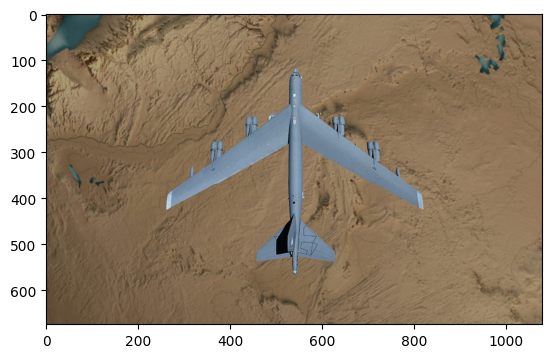

In [51]:
img_for_display = load_img("/content/drive/MyDrive/codes/HERO_B52-2020_GE_B52.jpg")
plt.imshow(img_for_display)
plt.show()

In [52]:
# test görüntüsü hazırlandı. tahmin aşamasına geçelim

preds = model.predict(img)

1/1 [==============================] - 1s 806ms/step


In [53]:
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

result = np.argmax(preds[0])
print(image_classes[result])

Boeing B-52
